# Data Cleaning P3

In [18]:
# Import libraries for data processing 
import numpy as np 
import pandas as pd 
import os, sys
import matplotlib.pyplot as plt 


In [19]:
# System configuration
sys.path.append(os.path.join(".."))

## Data Loading

In [20]:
# Import libraries for loading the data
from scripts.collection.collector import DataLoader

In [21]:
# Load categorical dataset
dataloader = DataLoader("Laptop_categorical_data.csv", folder="data\external")
dataset = dataloader.load()
dataset 

File accepted


,Brand,Currency,Color,Condition,GPU,Processor,Processor Speed,Processor Speed Unit,Type,OS,Storage Type,Hard Drive Capacity Unit,SSD Capacity Unit,Screen Size (inch),Ram Size Unit
0,other,$,gray,New,intel,quad core,3.8,GHz,notebook/laptop,windows,ssd,gb,tb,14,gb
1,dell,$,black,Very Good - Refurbished,intel,intel core i7 8th generation,4.2,GHz,notebook/laptop,windows,ssd,tb,unknown,14,unknown
2,dell,$,black,Used,intel,intel core i5-6300u,2.4,GHz,notebook/laptop,windows,ssd,gb,gb,14,gb
3,hp,$,black,Good - Refurbished,intel,intel celeron n,2.4,GHz,notebook/laptop,chrome,emmc,gb,unknown,11.6,gb
4,dell,$,other,Good - Refurbished,other,intel core i5 6th generation,1.4,GHz,notebook/laptop,windows,ssd,unknown,gb,12.5,gb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4178,other,$,other,New,other,undefined,NaN,unknown,other,unknown,unknown,unknown,unknown,NaN,unknown
4179,acer,$,other,New,other,not applicable,NaN,unknown,other,unknown,unknown,unknown,unknown,NaN,unknown
4180,dell,$,black,Used,intel,intel core i5 6th generation,2.8,GHz,notebook/laptop,windows,unknown,unknown,gb,12.5,unknown
4181,hp,$,other,New,other,not applicable,NaN,unknown,other,unknown,unknown,unknown,unknown,NaN,unknown


## Removal Nullvalues Analysis

In [22]:
# Import functionalities for checking and removing nullvalues 
from scripts.analysis.irrelevant_data_analyser import NullInspector

In [23]:
# Check if there are any null values and irrelevant data 
null_inspector = NullInspector(dataset)

null_df = null_inspector.inspect()
null_df

,Features,Nullvalues
0,Brand,0
1,Currency,0
2,Color,0
3,Condition,0
4,GPU,0
5,Processor,0
6,Processor Speed,2093
7,Processor Speed Unit,0
8,Type,0
9,OS,0


In [24]:
# Check datatype for the processor speed 
datatype = dataset["Processor Speed"].dtype
print(f"Processor Speed(Type): {datatype}")

# Check if there are actual nullvalues 
processor_speed = dataset["Processor Speed"]
num_nulls = processor_speed.isnull().sum()
records = processor_speed.shape[0]
print(f"Number of Null values (Processor Speed): {num_nulls}")
print(f"Total number of samples: {records}")
print(f"Ratio: {(num_nulls/records)*100:.2f}%")

Processor Speed(Type): object
Number of Null values (Processor Speed): 2093
Total number of samples: 4183
Ratio: 50.04%


**Removal Nullvalue Analysis: Insight**

From this analysis, there are no null values available across these features except the feature processor speed. According to the null value dataset, processor speed counts 2093 null values that provides a ratio of 50.04% of the entire dataset. However, we want to know whether these null values are actually null values. There is a liklihood if there are inconsistent data among the processor speed values. 

Thefore, another approach is useful to gain more insight about the actual reason for the data to become inconsistent. This is called the inconsistent analysis approach. This analysis technique enables to discover the number of inconsistencies the data contains. It could be special characters, pattern of inconsistent characters connected with digits, or a word or a phrase that deviate the numerical nature of the feature. As the processor speed is a numerical variable although it is identified as an object feature, the inconsistent analysis needs to be applied. 

## Inconsistency Analysis 

In [25]:
# Import functionalities for detecting and removing inconsistent data
from scripts.analysis.irrelevant_data_analyser import InconInspector

In [26]:
# Identify inconsistencies
incon_inspector = InconInspector(dataset)
incon_inspector.inspect()

,Features,Inconsistencies
0,Brand,4183
1,Currency,4183
2,Color,4183
3,Condition,4183
4,GPU,4183
5,Processor,4183
6,Processor Speed,14
7,Processor Speed Unit,4183
8,Type,4183
9,OS,4183


From this dataset, processor speed counts 14 inconsistent data. Now we will identify these inconsistent data further
which will be shown by this code below:

In [27]:
# Identify inconsistent data
processor_speed = dataset["Processor Speed"].values 
incon_data = incon_inspector.detect(feature_arr=processor_speed)

print(f"Feature: Processor Speed")
print(f"Number of inconsistent data: {len(incon_data)}")
print(f"Inconsistent data: {incon_data}")
print(f"Ratio (inconsistent data): {(len(incon_data)/records)*100:.2f}%")

Feature: Processor Speed
Number of inconsistent data: 14
Inconsistent data: ['o4.2' 'o3.4' 'o2.8' 'o3.9' 'o4.5' 'o3.3' 'o3.6' 'o3.4' 'o2.6' 'o3.4'
 '@1.7' 'o4.3' 'o3.4' 'o4.4']
Ratio (inconsistent data): 0.33%


**Inconsistency Analysis: Insight**

The inconsistency analysis produces these following insights:
- Besides all other features, Processor Speed shows 14 data that are inconsistent. These data are with the format 'char.xx.xx' while those x's represent numbers
- this provides statistically that Processor Speed has a ratio of 0.33% that are inconsistent which the total ratio of the entire dataset. 

Feature: Processor Speed
Number of cleaned data: 2076
Ratio: 49.63%


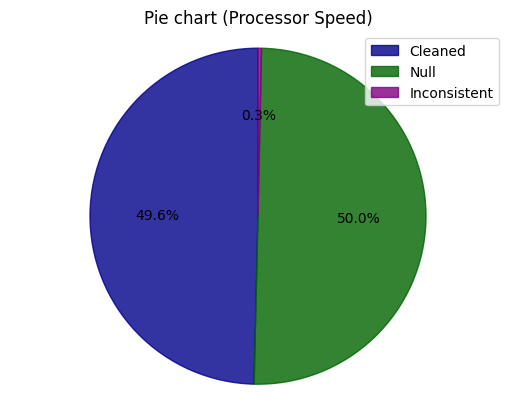

In [28]:
# Check number of clean data (excluding inconsistencies and null values)
num_incon_data = len(incon_data)
num_cleaned_data = records - (num_incon_data + num_nulls)
print(f"Feature: Processor Speed")
print(f"Number of cleaned data: {num_cleaned_data}")
print(f"Ratio: {(num_cleaned_data/records)*100:.2f}%")

# Implement function: Visualise the data distribution of processor speed 
def visualise_feature():
    processor_speed_vals = np.array([num_cleaned_data, num_nulls, num_incon_data])
    labels = np.array(["Cleaned", "Null", "Inconsistent"])

    fig, ax = plt.subplots()
    pies, annots, dd = ax.pie(processor_speed_vals, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.axis("equal")

    # change the pie color 
    colors = ["darkblue", "darkgreen", "purple"]
    for pie, color, annot in zip(pies, colors, annots): 
        # Change pie color 
        pie.set_color(color)
        pie.set_alpha(0.8)

        # Change annotation color 
        annot.set_color("white")

    plt.legend()
    plt.title("Pie chart (Processor Speed)")

    # Make sure the path exist
    os.makedirs(r"data\documentation\visuals", exist_ok=True)

    # Save image as .png
    plt.savefig(r"data\documentation\visuals\processor_speed_pie.png")
    plt.show()

# Make visualisation
visualise_feature() 

**Summary**

Processor Speed: 
- Number of Null values: 2093 (50.04%)
- Number of Inconsistent values: 14 (0.33%)
- Number of clean data: 2076
- Type: object

## Removing Nulls & Inconsistencies

In [29]:
# Import functionalities to remove null values and inconsistencies
from scripts.processing.cleaner import InconRemover
from scripts.processing.cleaner import NullRemover

In [30]:
# Implement function: remove a certain data 
def remove_data(type: str, feature:str): 
    # Instantiate remover objects
    null_remover = NullRemover(dataset)
    incon_remover = InconRemover(dataset)

    # Select which type of data need to be removed 
    if type == "null":
        # Remove nullvalues 
        null_remover.clean(feature)

        # Replace data that is unknown into 0.0
        dataset[feature] = dataset[feature].str.replace("unknown data", "0")

    elif type == "inconsistent":
        # Remove inconsistent data 
        incon_remover.clean(feature)

    else:
        print(f"Type of data is unknown. Please specify type of data")

In [31]:
# Remove null values & inconsistencies
remove_data("null", feature="Processor Speed")
remove_data("inconsistent", feature="Processor Speed")

# Check how many zero-values and nonzero values
dataset["Processor Speed"].value_counts()
zerovals = 2093
print(f"Number of zero values: {zerovals}")
print(f"Number of nonzero values: {records - zerovals}")

# Check for null values and inconsistencies 
incon_inspector2 = InconInspector(dataset)
null_inspector2 = NullInspector(dataset)

incon_inspector2.inspect()

Feature Processor Speed: 0 inconsistent data has been detected.
Number of zero values: 2093
Number of nonzero values: 2090


,Features,Inconsistencies
0,Brand,4183
1,Currency,4183
2,Color,4183
3,Condition,4183
4,GPU,4183
5,Processor,4183
6,Processor Speed,14
7,Processor Speed Unit,4183
8,Type,4183
9,OS,4183


In [32]:
null_inspector2.inspect()

,Features,Nullvalues
0,Brand,0
1,Currency,0
2,Color,0
3,Condition,0
4,GPU,0
5,Processor,0
6,Processor Speed,0
7,Processor Speed Unit,0
8,Type,0
9,OS,0


## Data Storage

In [33]:
# Implement functionality for datas storage
from scripts.collection.collector import DataSaver

In [34]:
# Save the dataset into cleaned folder 
filename = "Laptop_categorical_data_cleaned"
datasaver = DataSaver(folder="data\cleaned")
datasaver.save_one_ds(dataset, filename)

File Laptop_categorical_data_cleaned.csv has been stored successfully
